## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.api.types import CategoricalDtype

sns.set_theme(font_scale=1.5, style="darkgrid")

C:\Users\jabhi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jabhi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jabhi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\jabhi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Read Data

In [2]:
# Read indivual s
sd_listings = pd.read_csv('./Data/Listings/san_diego_listings.csv')
oakland_listings = pd.read_csv('./Data/Listings/oakland_listings.csv')
la_listings = pd.read_csv('./Data/Listings/los_angeles_listings.csv')
sf_listings = pd.read_csv('./Data/Listings/san_francisco_listings.csv')
scc_listings = pd.read_csv('./Data/Listings/santa_clara_county_listings.csv')
smc_listings = pd.read_csv('./Data/Listings/san_mateo_county_listings.csv')
sc_listings = pd.read_csv('./Data/Listings/santa_cruz_county_listings.csv')
pg_listings = pd.read_csv('./Data/Listings/pacific_grove_listings.csv')

listings = [sd_listings, oakland_listings, la_listings, sf_listings, scc_listings, smc_listings, sc_listings, pg_listings]
states = ['San Diego', 'Oakland', 'Los Angeles', 'San Francisco', 'Santa Clara County', 'San Mateo County', 'Santa Cruz County', 'Pacific Grove']

for i in range(len(listings)):
  listings[i]['state'] = states[i]

all_listings = pd.concat(listings, axis=0)
all_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,state
0,29967,https://www.airbnb.com/rooms/29967,20220918143850,2022-09-18,city scrape,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,...,4.80,4.76,NaN,f,5,5,0,0,0.59,San Diego
1,38245,https://www.airbnb.com/rooms/38245,20220918143850,2022-09-18,city scrape,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,...,4.61,4.40,NaN,f,3,0,3,0,1.02,San Diego
2,108349,https://www.airbnb.com/rooms/108349,20220918143850,2022-09-19,previous scrape,Felspar Townhome- Beach Living by Boardwalk & ...,Find location and privacy in our spacious town...,Pacific Beach is the most fun beach neighborho...,https://a0.muscache.com/pictures/a25c4e97-913d...,546519,...,4.89,4.69,NaN,t,2,2,0,0,1.20,San Diego
3,126344,https://www.airbnb.com/rooms/126344,20220918143850,2022-09-18,city scrape,"Tourmaline House - Steps to Beach, Pet-Friendly",Our stylish beach house in North Pacific Beach...,The house sits just 2 blocks off the beach at ...,https://a0.muscache.com/pictures/55dd5953-67a5...,546519,...,4.78,4.65,NaN,t,2,2,0,0,1.38,San Diego
4,54001,https://www.airbnb.com/rooms/54001,20220918143850,2022-09-18,city scrape,"La Jolla Garden Cottage: Blks to Ocn; 2Bdms, 1...","Quiet, off the beaten path, tranquility abound...","Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/47035b04-633c...,252692,...,4.97,4.89,NaN,f,2,1,1,0,2.08,San Diego


### Drop some columns

In [3]:
all_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80836 entries, 0 to 321
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            80836 non-null  int64  
 1   listing_url                                   80836 non-null  object 
 2   scrape_id                                     80836 non-null  int64  
 3   last_scraped                                  80836 non-null  object 
 4   source                                        69756 non-null  object 
 5   name                                          80833 non-null  object 
 6   description                                   79520 non-null  object 
 7   neighborhood_overview                         50237 non-null  object 
 8   picture_url                                   80836 non-null  object 
 9   host_id                                       80836 non-null  i

With a total of 75 columns, which is too many for a model, we had to remove columns. Initially, we
removed those columns which are not useful for predicting price (e.g. url, host-related features that are unrelated to the property, etc).

In [4]:
all_listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id', 
               'host_url', 'host_thumbnail_url', 'host_picture_url','calendar_updated', 
               'calendar_last_scraped', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes', 
               'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
               'host_since','host_location','host_about','host_neighbourhood','host_listings_count',
               'host_total_listings_count','host_total_listings_count','host_verifications'], axis=1, inplace=True)

#### Remove columns with majority null values

In [5]:
(all_listings.isna().sum() / all_listings.isna().count()) *100

id                                0.000000
name                              0.003711
description                       1.627988
neighborhood_overview            37.853184
host_name                         0.129893
host_response_time               15.517839
host_response_rate               15.517839
host_acceptance_rate             12.879163
host_is_superhost                 0.145975
host_has_profile_pic              0.129893
host_identity_verified            0.129893
neighbourhood                    37.851947
neighbourhood_cleansed            0.000000
neighbourhood_group_cleansed     53.082785
latitude                          0.000000
longitude                         0.000000
property_type                     0.000000
room_type                         0.000000
accommodates                      0.000000
bathrooms                       100.000000
bathrooms_text                    0.123707
bedrooms                          8.659508
beds                              1.642832
amenities  

From here, it seems like we can drop neighborhood_overview, neighbourhood, neighbourhood_group_cleansed, bathrooms, license. 

However, we will keep neighborhood_overview to potentially get it's sentiment value.

In [6]:
all_listings['license'].value_counts()

Exempt                                                                  1376
Exempt - This listing is a transient occupancy residential structure    1091
Exempt - This listing is a bed and breakfast                             441
License not needed per OSTR                                              350
City registration pending                                                269
                                                                        ... 
HSR20-000194                                                               1
HSR22-000239                                                               1
HSR21-000968                                                               1
HSR20-001600                                                               1
2022-003192STR                                                             1
Name: license, Length: 9301, dtype: int64

It can be that those who have a null value in the license column just don't have a license. Maybe we can try for a boolean category here.

In [7]:
all_listings['has_license'] = all_listings['license'].notnull()*1
all_listings.drop("license", axis = 1, inplace= True)

Let's remove the rest

In [8]:
all_listings.drop("neighbourhood", axis = 1, inplace= True)
all_listings.drop("neighbourhood_group_cleansed", axis = 1, inplace= True)
all_listings.drop("bathrooms", axis = 1, inplace= True)

Remove columns that have 1 or 0 unique values

In [9]:
# get number of unique values for each column
counts = all_listings.nunique()
counts_dict = counts.to_dict()

# record columns to delete (those that only have 1 or 0 unique values)
to_del = [i for i,v in counts_dict.items() if v == 1 or v == 0]
print(to_del)

# drop those columns
all_listings.drop(to_del, axis=1, inplace=True)
print(all_listings.shape)

[]
(80836, 51)


There are multiple columns for minimum and maximum night stays which seem to have minimal differences. The default min/max night stay values will be used instead.

In [10]:
all_listings.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

### Boolean columns

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_is_superhost'}>,
        <AxesSubplot:title={'center':'host_has_profile_pic'}>,
        <AxesSubplot:title={'center':'host_identity_verified'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'has_availability'}>,
        <AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'availability_60'}>,
        <AxesSubplot:title={'center':'availability_90'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'numb

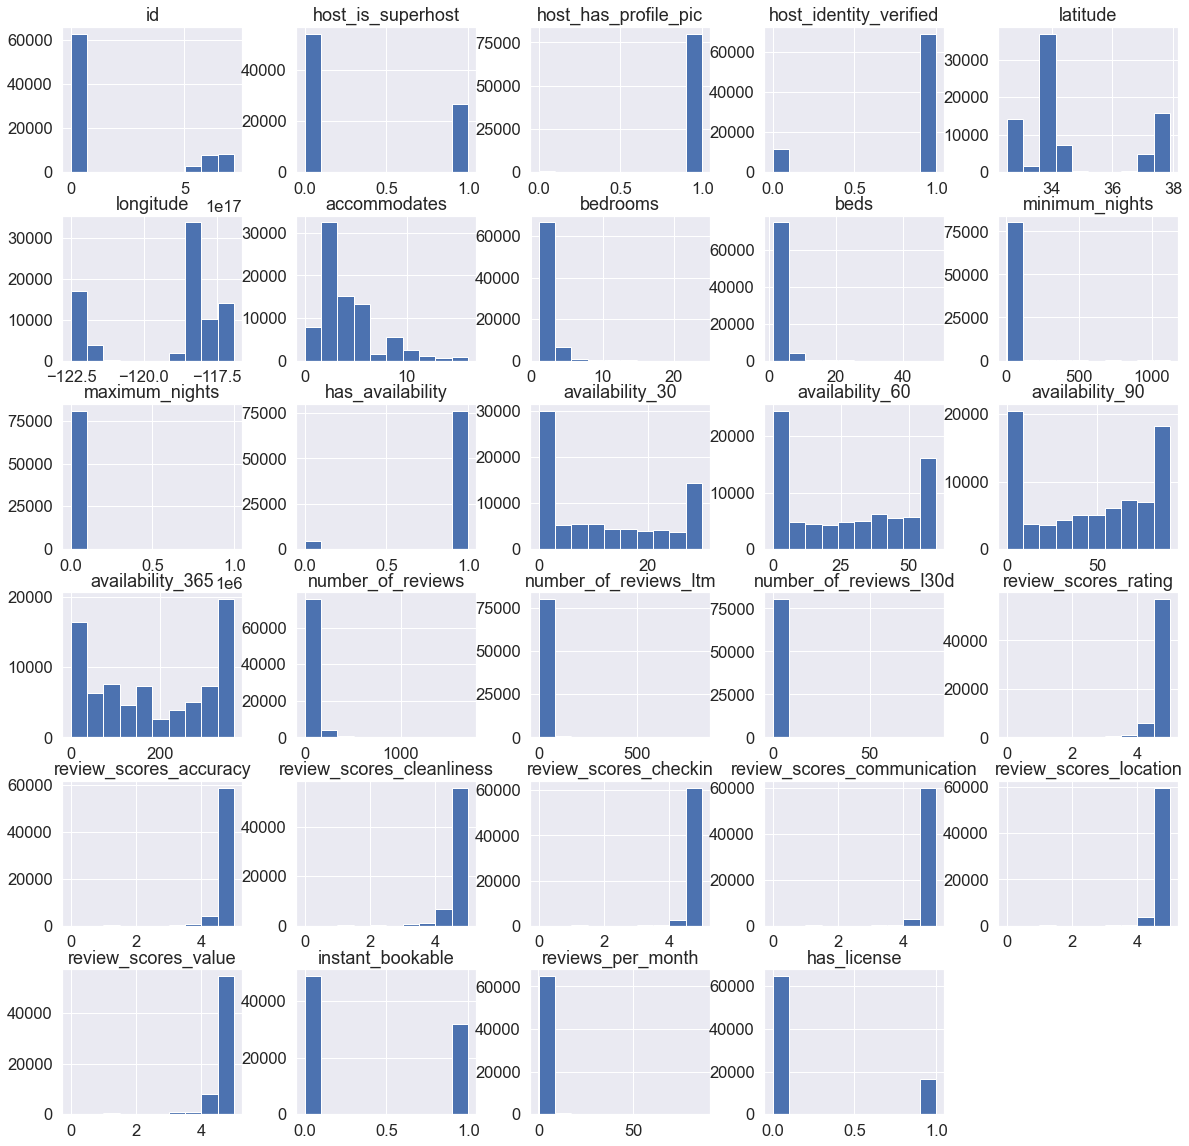

In [11]:
# Replacing columns with f/t with 0/1
all_listings.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
all_listings.hist(figsize=(20,20))

Drop those that have mostly just one category

In [12]:
all_listings.drop(['has_availability', 'host_has_profile_pic','has_availability'], axis=1, inplace=True)

#### Name

In [13]:
all_listings['name'].isna().sum()

3

There's only 3 null values, we can just remove those rows.

In [14]:
all_listings = all_listings[all_listings['name'].notna()]

#### host response time

In [15]:
print("Null values:", all_listings.host_response_time.isna().sum())
print(f"Proportion: {round((all_listings.host_response_time.isna().sum()/len(all_listings))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(all_listings[all_listings.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 12541
Proportion: 15.5%


4237

We'll fill the NA values wioth its own category

In [16]:
all_listings.host_response_time.fillna("NA", inplace=True)
all_listings.host_response_time.value_counts(normalize=True)

within an hour        0.643895
NA                    0.155147
within a few hours    0.128079
within a day          0.058380
a few days or more    0.014499
Name: host_response_time, dtype: float64

#### host response rate

In [17]:
print("Null values:", all_listings.host_response_rate.isna().sum())
print(f"Proportion: {round((all_listings.host_response_rate.isna().sum()/len(all_listings))*100, 1)}%")

Null values: 12541
Proportion: 15.5%


In [18]:
# Removing the % sign from the host_response_rate string and converting to an integer
all_listings.host_response_rate = all_listings.host_response_rate.str[:-1].astype('float')

print("Mean host response rate:", round(all_listings['host_response_rate'].mean(),0))
print("Median host response rate:", all_listings['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((all_listings.host_response_rate == 100.0).sum()/all_listings.host_response_rate.count())*100,1)}%")

Mean host response rate: 96.0
Median host response rate: 100.0
Proportion of 100% host response rates: 76.8%


In [19]:
# # Bin into four categories
# all_listings.host_response_rate = pd.cut(all_listings.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# # Converting to string
# all_listings.host_response_rate = all_listings.host_response_rate.astype('str')

# # Replace nulls with 'unknown'
# all_listings.host_response_rate.replace('nan', 'NA', inplace=True)

# # Category counts
# all_listings.host_response_rate.value_counts()

In [20]:
all_listings.host_response_rate.value_counts()

100.0    52441
90.0      1958
98.0      1886
99.0      1648
97.0      1606
         ...  
23.0         1
24.0         1
47.0         1
32.0         1
42.0         1
Name: host_response_rate, Length: 77, dtype: int64

In [21]:
bins = [0, 50, 70, 80, 90, 95, 101]
response_rate_labels = ['unresponsive', 'somewhat unresponsive', 'somewhat responsive', 'responsive', 'very responsive', 'extremely responsive']
# acceptance_rate_labels = ['very low', 'low', 'average', 'high', 'very high', 'extremely high']
all_listings['host_response_rate'] = pd.cut(all_listings['host_response_rate'], bins=bins, labels=response_rate_labels, right=False)
# all_listings['host_acceptance_rate'] = pd.cut(all_listings['host_acceptance_rate'], bins=bins, labels=acceptance_rate_labels, right=False)

In [22]:
cat_dtype_response = CategoricalDtype(categories=response_rate_labels+['NA'])
# cat_dtype_acceptance = CategoricalDtype(categories=acceptance_rate_labels+['NA'])
all_listings['host_response_rate'] = all_listings['host_response_rate'].astype(cat_dtype_response)
# all_listings['host_acceptance_rate'] = all_listings['host_acceptance_rate'].astype(cat_dtype_acceptance)
all_listings['host_response_rate'] = all_listings['host_response_rate'].fillna('NA')
# all_listings['host_acceptance_rate'] = all_listings['host_acceptance_rate'].fillna('NA')

#### Property Type

In [23]:
all_listings.property_type.value_counts()

Entire home                  18609
Entire rental unit           17179
Private room in home         11015
Entire condo                  6343
Entire guesthouse             3929
                             ...  
Private room in island           1
Shared room in cabin             1
Shared room in aparthotel        1
Cave                             1
Windmill                         1
Name: property_type, Length: 121, dtype: int64

In [24]:
# Replacing categories that are types of houses or rooms

property_categorisation = {
    'Entire': 'House',
    'Private room': 'Private Room',
    'Shared room': 'Shared Room',
    'Tiny home': 'House',
    'Room': 'Private Room'
}

def map_property_type(property_type):
    for key,value in property_categorisation.items():
        if key in property_type:
            return value
    return 'Others'

all_listings['property_type'] = all_listings['property_type'].apply(map_property_type)

In [25]:
all_listings['property_type'].value_counts()

House           57751
Private Room    21191
Shared Room      1257
Others            634
Name: property_type, dtype: int64

We don't want prices that are NA or have no value, so we'll remove them.

### Price

In [ ]:
all_listings["price"] = all_listings["price"].str[1:].str.replace(",","").astype("float")

In [29]:
all_listings = all_listings[all_listings['price'].notna()] 
all_listings = all_listings[all_listings.price!=0]

### Bathrooms

It's better to have separate columns for the number of bathrooms and the type of bathroom

In [33]:
all_listings["bathrooms"] = all_listings["bathrooms_text"].str.split(" ", expand=True)[0]
all_listings["bathroom_type"] = all_listings["bathrooms_text"].str.split(" ", expand=True)[1]
all_listings.drop("bathrooms_text", axis = 1, inplace= True)

In [37]:
all_listings['bathrooms'] = all_listings['bathrooms'].fillna('NA')
all_listings['bathroom_type'] = all_listings['bathroom_type'].fillna('NA')

In [50]:
mapping = {'Private': '1', 'Shared': '1', 'Half-bath': '1', 'NA': '1'}

all_listings = all_listings.replace({'bathrooms': mapping})

all_listings['bathrooms'] = all_listings['bathrooms'].astype('str').astype('float')

### Bedrooms & Beds

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

bedroom_not_na = all_listings[all_listings['bedrooms'].notna()]
bedrooms = bedroom_not_na['bedrooms']
accommodates = bedroom_not_na[['accommodates']]
bedrooms_model = LinearRegression()
bedrooms_model.fit(accommodates, bedrooms)
bedroom_pred = bedrooms_model.predict(accommodates)
mean_squared_error(bedrooms, bedroom_pred)

0.3915257421073288

In [35]:
bed_not_na = all_listings[all_listings['beds'].notna()]
beds = bed_not_na['beds']
accommodates = bed_not_na[['accommodates']]
beds_model = LinearRegression()
beds_model.fit(accommodates, beds)
bedroom_pred = beds_model.predict(accommodates)
mean_squared_error(beds, bedroom_pred)

0.8658301693377378

In [36]:
import math
import warnings

warnings.simplefilter("ignore", UserWarning)
for index, row in all_listings.iterrows():
  value = row['accommodates']
  if math.isnan(row['bedrooms']):
    all_listings.at[index, 'bedrooms'] = round(bedrooms_model.predict([[value]])[0])
  if math.isnan(row['beds']):
    all_listings.at[index, 'beds'] = round(beds_model.predict([[value]])[0])

### Amenities

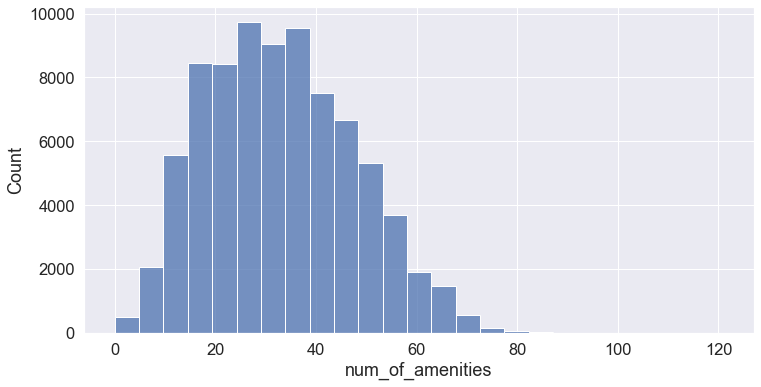

In [39]:
import ast

def get_length(text):
  amenities_list = ast.literal_eval(text)
  return len(amenities_list)

all_listings['num_of_amenities'] = all_listings.amenities.apply(get_length)
fig, ax = plt.subplots(figsize=(12, 6))
hp = sns.histplot(all_listings['num_of_amenities'], bins=25)

In [40]:
import ast

all_listings.reset_index(inplace=True)
amenities_categorisation = {
    'essentials': ['soap', 'shampoo', 'towel', 'conditioner', 'toiletries', 'linen', 'water'],
    'luxury': ['pool', 'tub', 'park', 'sound', 'wifi'],
    'appliances': ['refrigerator', 'stove', 'oven', 'washer', 'dryer', 'microwave'],
    'comfort': ['heat', 'air condition'],
    'entertainment': ['tv', 'console', 'gym', 'game', 'entertainment'],
    'security': ['lock', 'alarm', 'guard'],
    'furniture': ['storage', 'chair', 'table', 'bed']
}

for category in amenities_categorisation.keys():
  all_listings[category] = 0
all_listings['miscellaneous'] = 0

def category_counter(amenity, idx):
  for category, category_list in amenities_categorisation.items():
    for item in category_list:
      if item in amenities.lower():
        all_listings.loc[idx, category] += 1
        return True
  return False

unmapped_amenities = []
for i in range(all_listings.shape[0]):
  amenities_list = ast.literal_eval(all_listings.loc[i, 'amenities'])
  for amenities in amenities_list:
    mapped = category_counter(amenities, i)
    if not mapped:
      all_listings.loc[i, 'miscellaneous'] += 1 
      if amenities not in unmapped_amenities:
        unmapped_amenities.append(amenities)

### Availability

There are multiple different measures of availability, which will be highly correlated with each other. Only one will be retained - for 30 days.

In [41]:
all_listings.drop(['availability_60', 'availability_90', 'availability_365'], axis=1, inplace=True)

### Gender Split

In [42]:
import gender_guesser.detector as gender

d = gender.Detector()
all_listings['host_gender'] = all_listings['host_name'].apply(lambda x: d.get_gender(x))

gender_mapping = {'mostly_female': 'female', 'mostly_male': 'male', 'andy': 'unknown'}

all_listings = all_listings.replace({'host_gender': gender_mapping})

### Review Scores

In [43]:
review_missing = all_listings[all_listings['review_scores_rating'].isna()]
reviews_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
review_missing[reviews_columns].isnull().sum()

review_scores_rating           15617
review_scores_accuracy         15617
review_scores_cleanliness      15617
review_scores_checkin          15617
review_scores_communication    15617
review_scores_location         15617
review_scores_value            15617
reviews_per_month              15617
dtype: int64

In [44]:
from pandas.api.types import CategoricalDtype

# high number of missing values, unfeasible to drop completely. imputation might not be valuable, hence best to encode as missing (logical as a consumer)

review_bins = []
review_bin_labels = []
columns_to_bin = ['review_scores_rating']

left, right = 0, 0.1
for i in range(50):
  review_bins += [left]
  label = str(left) + ' to ' + str(right)
  review_bin_labels += [label]
  left = round(left + 0.1, 1)
  right = round(right + 0.1, 1)
  if i == 49:
    review_bins += [5.1]

all_listings['review_scores_rating'] = pd.cut(all_listings['review_scores_rating'], bins=review_bins, labels=review_bin_labels, right=False)

all_listings['reviews_per_month'] = all_listings['reviews_per_month'].fillna(value=0)

cat_dtype = CategoricalDtype(categories=review_bin_labels+['NA'])
all_listings['review_scores_rating'] = all_listings['review_scores_rating'].astype(cat_dtype)
all_listings['review_scores_rating'] = all_listings['review_scores_rating'].fillna(value='NA')

In [47]:
all_listings.drop(['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1, inplace=True)

### Description Sentiment

In [45]:
from textblob import TextBlob

def detect_sentiment(text):
  if pd.isnull(text):
    return -2
  blob = TextBlob(str(text))
  return blob.sentiment.polarity

all_listings['description_sentiment'] = all_listings.description.apply(detect_sentiment)
all_listings['neighborhood_overview_sentiment'] = all_listings.neighborhood_overview.apply(detect_sentiment)

bins = [-2, -1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1.01]
labels = ['NA', 'Very Negative', 'Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Positive', 'Very Positive']

all_listings['description_sentiment'] = pd.cut(all_listings['description_sentiment'], bins, labels=labels, right=False)
all_listings['neighborhood_overview_sentiment'] = pd.cut(all_listings['neighborhood_overview_sentiment'], bins, labels=labels, right=False)

### Final check on columns

In [58]:
all_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80809 entries, 0 to 80808
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   id                               80809 non-null  int64   
 1   name                             80809 non-null  object  
 2   description                      79517 non-null  object  
 3   neighborhood_overview            50236 non-null  object  
 4   host_response_time               80809 non-null  object  
 5   host_response_rate               80809 non-null  category
 6   host_is_superhost                80710 non-null  float64 
 7   host_identity_verified           80704 non-null  float64 
 8   neighbourhood_cleansed           80809 non-null  object  
 9   latitude                         80809 non-null  float64 
 10  longitude                        80809 non-null  float64 
 11  property_type                    80809 non-null  object  
 12  room

Removing columns that are repeated or have been processed

In [52]:
all_listings.drop(['reviews_per_month', 'first_review', 'last_review', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'host_name','index','host_acceptance_rate'], axis=1, inplace=True)

In [60]:
all_listings.to_csv('cleaned_full_data.csv')